# Dimensionality Reduction in R

#### Métodos Intensivos de Computación Estadística

#### Juan Sebastián Corredor Rodriguez - jucorredorr@unal.edu.

The main idea of this notebook is to present some dimensionality reduction methods in R and evaluate its results and performance. Specifically, the methods are:
1. [PCA (Principal Component Analysis)](https://en.wikipedia.org/wiki/Principal_component_analysis).
2. [LLE (Locally Linear Embedding)](http://www.robots.ox.ac.uk/~az/lectures/ml/lle.pdf).
3. [Isomap (Isometric Feature Mapping)](https://en.wikipedia.org/wiki/Isomap). 

#### Principal Component Analysis (PCA)

Let's evlauate how to implement this method in R. First let's run an R script with some multivariate distributions on certain manifolds. If you want to see it go to https://github.com/juanse1608/Functions/blob/master/Distributions.R.

See http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/118-principal-component-analysis-in-r-prcomp-vs-princomp/.

In [1]:
#Run the Rscript
source('~/Documents/Git Repositories/Functions/Distributions.R')

In [2]:
ls()

[1] "rmburr"     "rmixture"   "rmnorm"     "rmobius"    "rmobius2"  
 [6] "rmunif"     "rpara"      "rpara2"     "rparaunif"  "rsphere"   
[11] "rsphere2"   "rswiss"     "rswiss2"    "rtorus"     "rtorus2"   
[16] "runiball"   "rvariedad"  "rvariedad2"

In [92]:
#install.packages('factoextra')
#install.packages('dimRed')
#install.packages('car')
#install.packages('plot3D')
#install.packages('lle')
#install.packages('RSpectra')
#install.packages('RANN')
#install.packages('ider')
library(factoextra)
library(dimRed)
library(car)
library(plot3D)
library(ider)

Warning message:
“package ‘RDRToolbox’ is not available (for R version 3.6.0)”

In [4]:
#Load data from a decathlon
data(decathlon2)
print(c(nrow(decathlon2), ncol(decathlon2)))

[1] 27 13


In [5]:
print(head(decathlon2))

          X100m Long.jump Shot.put High.jump X400m X110m.hurdle Discus
SEBRLE    11.04      7.58    14.83      2.07 49.81        14.69  43.75
CLAY      10.76      7.40    14.26      1.86 49.37        14.05  50.72
BERNARD   11.02      7.23    14.25      1.92 48.93        14.99  40.87
YURKOV    11.34      7.09    15.19      2.10 50.42        15.31  46.26
ZSIVOCZKY 11.13      7.30    13.48      2.01 48.62        14.17  45.67
McMULLEN  10.83      7.31    13.76      2.13 49.91        14.38  44.41
          Pole.vault Javeline X1500m Rank Points Competition
SEBRLE          5.02    63.19  291.7    1   8217    Decastar
CLAY            4.92    60.15  301.5    2   8122    Decastar
BERNARD         5.32    62.77  280.1    4   8067    Decastar
YURKOV          4.72    63.44  276.4    5   8036    Decastar
ZSIVOCZKY       4.42    55.37  268.0    7   8004    Decastar
McMULLEN        4.42    56.37  285.1    8   7995    Decastar


In [6]:
str(decathlon2)

'data.frame':	27 obs. of  13 variables:
 $ X100m       : num  11 10.8 11 11.3 11.1 ...
 $ Long.jump   : num  7.58 7.4 7.23 7.09 7.3 7.31 6.81 7.56 6.97 7.27 ...
 $ Shot.put    : num  14.8 14.3 14.2 15.2 13.5 ...
 $ High.jump   : num  2.07 1.86 1.92 2.1 2.01 2.13 1.95 1.86 1.95 1.98 ...
 $ X400m       : num  49.8 49.4 48.9 50.4 48.6 ...
 $ X110m.hurdle: num  14.7 14.1 15 15.3 14.2 ...
 $ Discus      : num  43.8 50.7 40.9 46.3 45.7 ...
 $ Pole.vault  : num  5.02 4.92 5.32 4.72 4.42 4.42 4.92 4.82 4.72 4.62 ...
 $ Javeline    : num  63.2 60.1 62.8 63.4 55.4 ...
 $ X1500m      : num  292 302 280 276 268 ...
 $ Rank        : int  1 2 4 5 7 8 9 10 11 12 ...
 $ Points      : int  8217 8122 8067 8036 8004 7995 7802 7733 7708 7651 ...
 $ Competition : Factor w/ 2 levels "Decastar","OlympicG": 1 1 1 1 1 1 1 1 1 1 ...


In [7]:
decathlon2_train = decathlon2[1:23,1:10] 

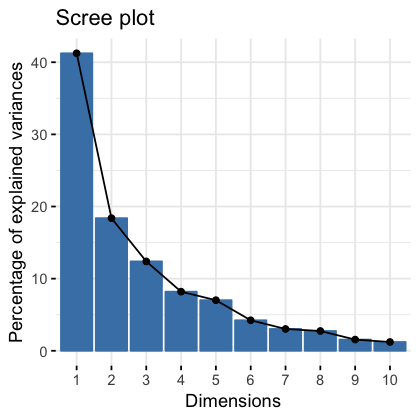

In [8]:
#We implmement PCA and plot the variance explained by each one of the directions 
res_pca = prcomp(decathlon2_train, scale = TRUE)

options(repr.plot.width = 3.5, repr.plot.height = 3.5)
fviz_eig(res_pca)

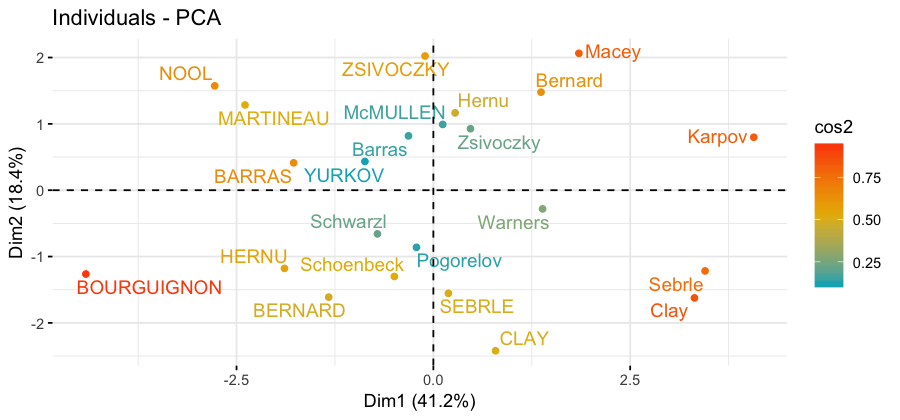

In [9]:
options(repr.plot.width = 7.5, repr.plot.height = 3.5)
fviz_pca_ind(res_pca, col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)# Avoid text overlapping

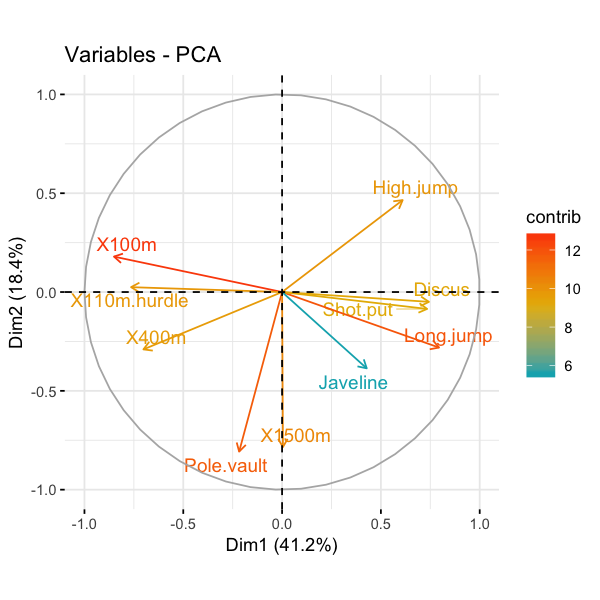

In [10]:
options(repr.plot.width = 5, repr.plot.height = 5)
fviz_pca_var(res_pca, col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), repel = TRUE)     # Avoid text overlapping

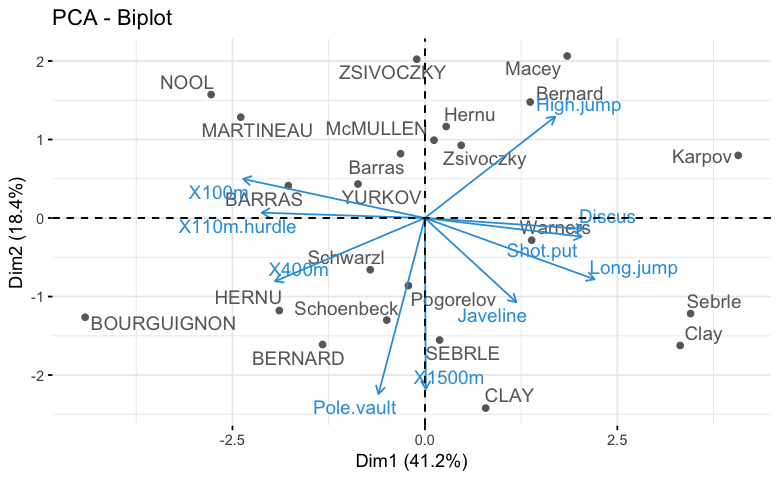

In [11]:
options(repr.plot.width = 6.5, repr.plot.height = 4)
fviz_pca_biplot(res_pca, repel = TRUE, col.var = "#2E9FDF", # Variables color
                col.ind = "#696969")  # Individuals color

#### Some important outcomes of the model

Let's see how to obtain some important results of the PCA.

In [12]:
#Eigenvalues
eig_val <- get_eigenvalue(res_pca)
print(eig_val)

       eigenvalue variance.percent cumulative.variance.percent
Dim.1   4.1242133        41.242133                    41.24213
Dim.2   1.8385309        18.385309                    59.62744
Dim.3   1.2391403        12.391403                    72.01885
Dim.4   0.8194402         8.194402                    80.21325
Dim.5   0.7015528         7.015528                    87.22878
Dim.6   0.4228828         4.228828                    91.45760
Dim.7   0.3025817         3.025817                    94.48342
Dim.8   0.2744700         2.744700                    97.22812
Dim.9   0.1552169         1.552169                    98.78029
Dim.10  0.1219710         1.219710                   100.00000


In [13]:
#Results for Variables
res_var <- get_pca_var(res_pca)
print(head(res_var$coord))          #Coordinates
#print(res_var$contrib)        #Contributions to the PCs
#print(res_var$cos2)           #Quality of representation 

                  Dim.1       Dim.2      Dim.3       Dim.4      Dim.5
X100m        -0.8506257  0.17939806 -0.3015564  0.03357320 -0.1944440
Long.jump     0.7941806 -0.28085695  0.1905465 -0.11538956  0.2331567
Shot.put      0.7339127 -0.08540412 -0.5175978  0.12846837 -0.2488129
High.jump     0.6100840  0.46521415 -0.3300852  0.14455012  0.4027002
X400m        -0.7016034 -0.29017826 -0.2835329  0.43082552  0.1039085
X110m.hurdle -0.7641252  0.02474081 -0.4488873 -0.01689589  0.2242200
                    Dim.6        Dim.7        Dim.8       Dim.9      Dim.10
X100m         0.035374780 -0.091336386 -0.104716925 -0.30306448  0.04441797
Long.jump    -0.033727883 -0.154330810 -0.397380703 -0.05158951  0.02971945
Shot.put     -0.239789034 -0.009886612  0.024359049  0.04778655  0.21745195
High.jump    -0.284644846  0.028157465  0.084405578 -0.11213822 -0.13356677
X400m        -0.049289996  0.286106008 -0.233552216  0.08216041 -0.03417067
X110m.hurdle  0.002632395 -0.370072158 -0.008344682  0

In [14]:
#Results for individuals
res_ind <- get_pca_ind(res_pca)
print(head(res_ind$coord))          # Coordinates
#print(res_ind$contrib)        # Contributions to the PCs
#print(res_ind$cos2)           # Quality of representation 

               Dim.1      Dim.2      Dim.3       Dim.4       Dim.5      Dim.6
SEBRLE     0.1912074 -1.5541282 -0.6283688  0.08205241  1.14261394 -0.4638976
CLAY       0.7901217 -2.4204156  1.3568870  1.26984296 -0.80684837  1.3042002
BERNARD   -1.3292592 -1.6118687 -0.1961500 -1.92092203  0.08234282 -0.4006287
YURKOV    -0.8694134  0.4328779 -2.4739822  0.69723814  0.39885841  0.1028634
ZSIVOCZKY -0.1057450  2.0233632  1.3049312 -0.09929630 -0.19702411  0.8955411
McMULLEN   0.1185550  0.9916237  0.8435582  1.31215266  1.58587086  0.1865728
                Dim.7       Dim.8       Dim.9      Dim.10
SEBRLE    -0.20796012  0.04346057 -0.65934414  0.03273238
CLAY      -0.21291866  0.61724061 -0.06012536 -0.31716015
BERNARD   -0.40643754  0.70385604  0.17008331 -0.09908142
YURKOV    -0.32487448  0.11499613 -0.10952404 -0.11969720
ZSIVOCZKY  0.08825624 -0.20234130 -0.52310310 -0.34842265
McMULLEN   0.47828432  0.29308997 -0.10562320 -0.39317797


#### Isometric Feature Mapping (Isomap) and Locally Linear Embedding (LLE)

Let's see the performande of this methods in the Swiss Roll. The main idea of this two methodso is to think in a local way by analyzing k-nearest neighbors in each data point.

See https://cran.r-project.org/web/packages/dimRed/dimRed.pdf.

In [120]:
#Let's simulate data in the swiss roll 
n = 1000
swiss_data = gendata(DataName = "SwissRoll", n = n)
swiss_data = data.frame(swiss_data)

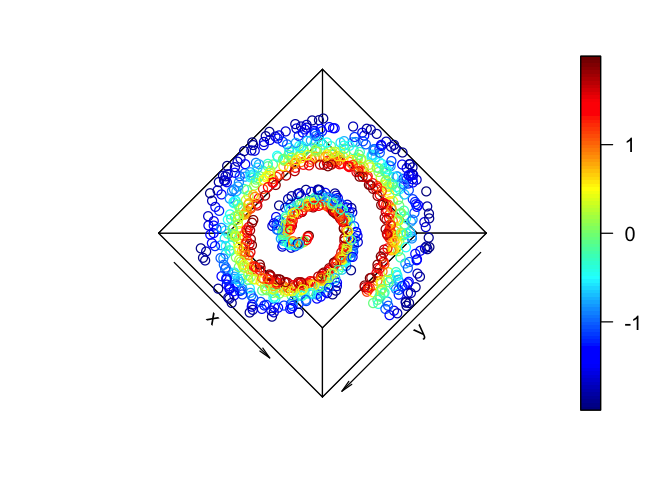

In [134]:
scatter3D(x = swiss_data[, 1], y = swiss_data[, 2], z = swiss_data[, 3], phi = -90, theta = -45)

In [107]:
dimRedMethodList()

[1] "AutoEncoder"         "DiffusionMaps"       "DRR"                
 [4] "FastICA"             "KamadaKawai"         "DrL"                
 [7] "FruchtermanReingold" "HLLE"                "Isomap"             
[10] "kPCA"                "PCA_L1"              "LaplacianEigenmaps" 
[13] "LLE"                 "MDS"                 "nMDS"               
[16] "NNMF"                "PCA"                 "tSNE"               
[19] "UMAP"

In [111]:
#Embedding data using the two methods
embedding_isompap = embed(swiss_data, "Isomap", .mute = c("message", "output"), knn = floor(log(n)))
embedding_lle = embed(swiss_data, "LLE" , .mute = c("message", "output"), knn = floor(sqrt(n)))
#embedding_pca = embed(swiss_data, "PCA" , .mute = c("message", "output"))

2019-06-19 10:06:24: Isomap START
2019-06-19 10:06:24: constructing knn graph
2019-06-19 10:06:24: calculating geodesic distances
2019-06-19 10:06:24: Classical Scaling


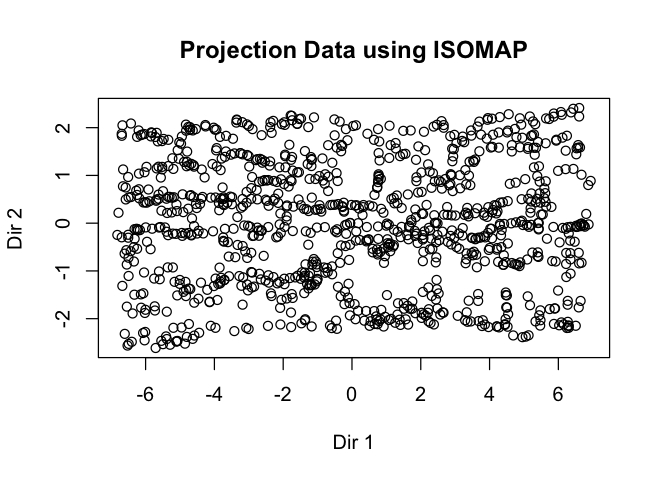

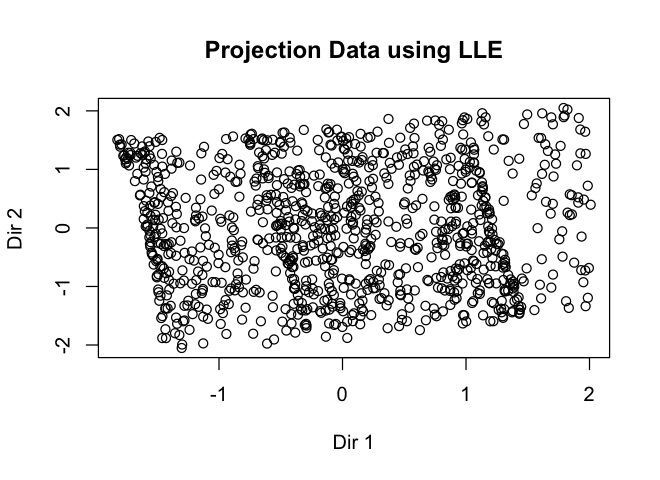

In [121]:
options(repr.plot.width = 5.5, repr.plot.height = 4)
plot.d(embedding_isompap, type = '2vars', main = 'Projection Data using ISOMAP', xlab = 'Dir 1',
     ylab = 'Dir 2')
plot(embedding_lle, type = '2vars', main = 'Projection Data using LLE', xlab = 'Dir 1',
     ylab = 'Dir 2')
#plot(embedding_pca, type = '2vars', main = 'Projection Data using PCA', xlab = 'Dir 1',
#     ylab = 'Dir 2')